<a href="https://colab.research.google.com/github/ss1705/ai-traffic-system/blob/main/Seatbelt_Detect_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207

In [2]:
from google.colab import drive

In [3]:
mount_path = "/content/drive"
drive.mount(mount_path)

Mounted at /content/drive


In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="f83hmp9djxTjyj2lVChy")
project = rf.workspace("detection-system-19xfm").project("seatbelt-numberplate-detection")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SeatBelt-NumberPlate-Detection-3 in yolov8:: 100%|██████████| 1816/1816 [00:00<00:00, 7226.80it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
from ultralytics import YOLO

In [7]:
model = YOLO("yolov8m.pt")  # Use YOLOv8 Medium model (or yolov8s.pt for small)

model.train(data="/content/SeatBelt-NumberPlate-Detection-3/data.yaml",  # Path to dataset config file
            epochs=50,  # Increase if needed
            imgsz=640,  # Image size
            batch=4,  # Adjust based on GPU memory
            workers=4,  # Adjust based on CPU cores
            project="seatbelt_yolo_training",
            name="yolov8_seatbelt",
            save=True)

100%|██████████| 49.7M/49.7M [00:00<00:00, 349MB/s]


Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/SeatBelt-NumberPlate-Detection-3/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=seatbelt_yolo_training, name=yolov8_seatbelt2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

100%|██████████| 5.35M/5.35M [00:00<00:00, 113MB/s]


AMP: checks passed ✅


train: Scanning /content/SeatBelt-NumberPlate-Detection-3/train/labels... 789 images, 1 backgrounds, 0 corrupt: 100%|██████████| 789/789 [00:00<00:00, 1778.40it/s]

train: New cache created: /content/SeatBelt-NumberPlate-Detection-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/SeatBelt-NumberPlate-Detection-3/valid/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 1459.70it/s]

val: New cache created: /content/SeatBelt-NumberPlate-Detection-3/valid/labels.cache


Plotting labels to seatbelt_yolo_training/yolov8_seatbelt2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to seatbelt_yolo_training/yolov8_seatbelt2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.97G      2.305      3.603      2.201          4        640: 100%|██████████| 198/198 [00:36<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]

                   all         75        118      0.336      0.487       0.36      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.09G      2.288      2.786      2.264          1        640: 100%|██████████| 198/198 [00:32<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.48it/s]

                   all         75        118        0.5      0.471      0.432      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.1G      2.295      2.686      2.244          1        640: 100%|██████████| 198/198 [00:32<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.97it/s]

                   all         75        118      0.473      0.392      0.407      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.1G      2.288       2.64      2.291          1        640: 100%|██████████| 198/198 [00:33<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.11it/s]

                   all         75        118      0.611      0.436      0.448      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.08G      2.328      2.528      2.257          1        640: 100%|██████████| 198/198 [00:32<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.96it/s]

                   all         75        118      0.504      0.532      0.542      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.09G      2.211      2.361      2.237          0        640: 100%|██████████| 198/198 [00:33<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.00it/s]

                   all         75        118      0.514        0.6      0.622      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.09G      2.166      2.329      2.187          4        640: 100%|██████████| 198/198 [00:32<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.82it/s]

                   all         75        118      0.432      0.624      0.549      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.08G      2.163      2.212      2.214          2        640: 100%|██████████| 198/198 [00:33<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.88it/s]

                   all         75        118      0.549      0.475      0.566      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.07G      2.119      2.173      2.113          2        640: 100%|██████████| 198/198 [00:33<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.66it/s]

                   all         75        118      0.504      0.616      0.603      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.08G      2.124      2.174      2.142          2        640: 100%|██████████| 198/198 [00:33<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.95it/s]

                   all         75        118      0.611       0.65       0.67       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.08G      2.145      2.165      2.152          1        640: 100%|██████████| 198/198 [00:34<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.95it/s]

                   all         75        118      0.694      0.592      0.679      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.09G      2.052      2.003      2.071          2        640: 100%|██████████| 198/198 [00:33<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.99it/s]

                   all         75        118      0.623      0.619      0.636       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.1G      2.054      1.925      2.075          2        640: 100%|██████████| 198/198 [00:33<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.88it/s]

                   all         75        118      0.606      0.629      0.648      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.09G      2.019      1.878      2.067          5        640: 100%|██████████| 198/198 [00:34<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.82it/s]


                   all         75        118      0.599      0.632      0.674      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.07G      2.069      1.864      2.072          1        640: 100%|██████████| 198/198 [00:34<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.98it/s]

                   all         75        118      0.801      0.647      0.728      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.08G      2.025      1.819      2.051          7        640: 100%|██████████| 198/198 [00:33<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.67it/s]

                   all         75        118      0.614      0.647      0.729      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.08G       2.01      1.812       2.05          1        640: 100%|██████████| 198/198 [00:33<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.93it/s]

                   all         75        118      0.703      0.663      0.771       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.09G      2.002      1.746      2.044          1        640: 100%|██████████| 198/198 [00:33<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.82it/s]

                   all         75        118      0.642      0.657      0.751      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.09G       2.01      1.743      2.042          4        640: 100%|██████████| 198/198 [00:33<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.97it/s]

                   all         75        118      0.757       0.66      0.768       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.07G      1.927      1.635      1.969          0        640: 100%|██████████| 198/198 [00:33<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.90it/s]

                   all         75        118      0.822      0.691      0.774      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.08G       1.99      1.679      2.039          1        640: 100%|██████████| 198/198 [00:33<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.52it/s]


                   all         75        118       0.78      0.749      0.783      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.08G      2.014      1.727      2.032          5        640: 100%|██████████| 198/198 [00:33<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.99it/s]

                   all         75        118      0.787      0.749      0.771      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.08G      1.961      1.648      2.026          1        640: 100%|██████████| 198/198 [00:34<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.82it/s]

                   all         75        118      0.737      0.739      0.742       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.09G      1.939      1.619      1.997          1        640: 100%|██████████| 198/198 [00:33<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.70it/s]

                   all         75        118      0.746      0.736      0.796      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.07G      1.922      1.609      2.012          0        640: 100%|██████████| 198/198 [00:33<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.91it/s]

                   all         75        118      0.775      0.732      0.817      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.09G      1.938       1.59      1.955          0        640: 100%|██████████| 198/198 [00:34<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.84it/s]

                   all         75        118      0.754      0.763      0.778       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.08G      1.883      1.566      1.971          5        640: 100%|██████████| 198/198 [00:33<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.79it/s]

                   all         75        118       0.78      0.682      0.767      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.08G       1.91      1.559      1.947          1        640: 100%|██████████| 198/198 [00:34<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.65it/s]

                   all         75        118      0.737      0.712      0.751      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.08G      1.878      1.482      1.923          5        640: 100%|██████████| 198/198 [00:33<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.74it/s]

                   all         75        118      0.694      0.759      0.779      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.07G      1.867      1.485      1.934          0        640: 100%|██████████| 198/198 [00:33<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.94it/s]

                   all         75        118      0.758      0.744      0.794      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.08G      1.868      1.411      1.942          2        640: 100%|██████████| 198/198 [00:34<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.82it/s]

                   all         75        118      0.789      0.757      0.802      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.08G      1.872      1.446      1.962          1        640: 100%|██████████| 198/198 [00:33<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.10it/s]

                   all         75        118      0.738      0.762      0.793      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.08G      1.855      1.373      1.972          4        640: 100%|██████████| 198/198 [00:33<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.87it/s]

                   all         75        118      0.767      0.686      0.789      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.1G      1.814       1.35      1.932          1        640: 100%|██████████| 198/198 [00:34<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.97it/s]

                   all         75        118      0.782      0.723      0.768      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.08G      1.813      1.342       1.88          3        640: 100%|██████████| 198/198 [00:33<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.99it/s]


                   all         75        118      0.711      0.827        0.8      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.1G      1.793      1.302      1.847          6        640: 100%|██████████| 198/198 [00:33<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.98it/s]

                   all         75        118       0.75      0.743      0.805      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.09G      1.771      1.304      1.857          3        640: 100%|██████████| 198/198 [00:34<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.48it/s]

                   all         75        118      0.766      0.765      0.832      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.09G      1.773      1.314      1.877          5        640: 100%|██████████| 198/198 [00:33<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.83it/s]


                   all         75        118      0.819      0.728      0.808      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.08G      1.771      1.277      1.897          2        640: 100%|██████████| 198/198 [00:34<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.87it/s]

                   all         75        118      0.749      0.785      0.827      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.07G      1.748      1.313      1.843          0        640: 100%|██████████| 198/198 [00:33<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.49it/s]

                   all         75        118      0.768      0.776      0.821      0.338


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.06G      1.712      1.165      1.928          1        640: 100%|██████████| 198/198 [00:34<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.90it/s]

                   all         75        118      0.818      0.778      0.821      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.09G        1.7      1.142      1.942          2        640: 100%|██████████| 198/198 [00:33<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.01it/s]

                   all         75        118      0.716      0.833       0.81      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.09G      1.673      1.091      1.921          1        640: 100%|██████████| 198/198 [00:33<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.93it/s]

                   all         75        118      0.775       0.76      0.795      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.08G      1.657       1.09      1.909          2        640: 100%|██████████| 198/198 [00:34<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.88it/s]

                   all         75        118       0.85      0.728      0.809      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.07G      1.643      1.052      1.886          1        640: 100%|██████████| 198/198 [00:33<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.99it/s]

                   all         75        118      0.834      0.717      0.803      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.09G      1.613      1.008      1.858          4        640: 100%|██████████| 198/198 [00:33<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.94it/s]

                   all         75        118      0.788      0.762      0.811      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.08G      1.603      1.015      1.851          2        640: 100%|██████████| 198/198 [00:34<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.83it/s]

                   all         75        118      0.835      0.738      0.799      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.08G      1.593     0.9815      1.853          1        640: 100%|██████████| 198/198 [00:33<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  7.69it/s]

                   all         75        118      0.815      0.738        0.8       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.07G      1.574     0.9764      1.833          1        640: 100%|██████████| 198/198 [00:33<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  9.03it/s]

                   all         75        118      0.769      0.794      0.804      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.08G      1.578     0.9764      1.865          1        640: 100%|██████████| 198/198 [00:34<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  8.82it/s]

                   all         75        118      0.823       0.77      0.814      0.327



50 epochs completed in 0.504 hours.
Optimizer stripped from seatbelt_yolo_training/yolov8_seatbelt2/weights/last.pt, 52.0MB
Optimizer stripped from seatbelt_yolo_training/yolov8_seatbelt2/weights/best.pt, 52.0MB

Validating seatbelt_yolo_training/yolov8_seatbelt2/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.48it/s]


                   all         75        118      0.749      0.785      0.826      0.351
           noseat-belt         35         35      0.831      0.771      0.899       0.38
          number-plate         33         33        0.7      0.667      0.685      0.289
             seat-belt         43         50      0.718      0.915      0.894      0.385
Speed: 0.4ms preprocess, 11.4ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to seatbelt_yolo_training/yolov8_seatbelt2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc9cdae4c10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [8]:
model = YOLO("/content/seatbelt_yolo_training/yolov8_seatbelt2/weights/best.pt")

In [9]:
import cv2
from IPython.display import display
from PIL import Image


image 1/1 /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-test.jpg: 640x640 2 seat-belts, 37.1ms
Speed: 2.4ms preprocess, 37.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


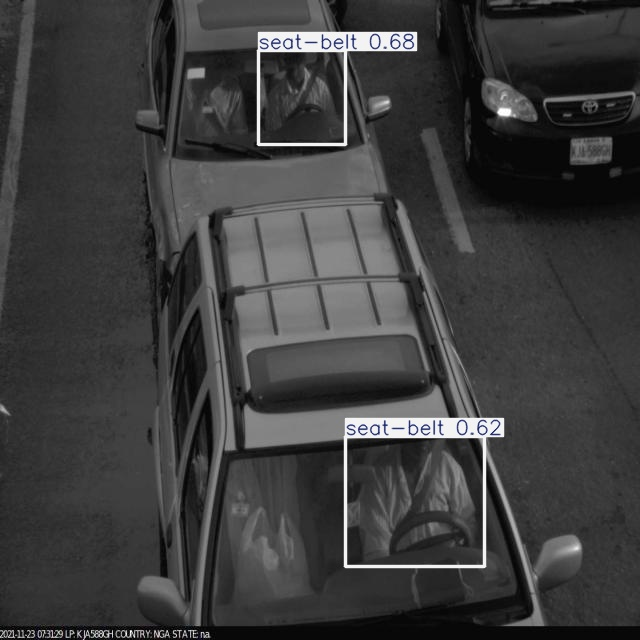

In [10]:
results = model("/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-test.jpg", conf=0.5)

for result in results:
    result.save(filename="/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-out.jpg")  # Saves detection result

img = Image.open("/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-out.jpg")
display(img)


image 1/1 /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-test-1.jpg: 640x640 1 noseat-belt, 1 number-plate, 37.2ms
Speed: 3.1ms preprocess, 37.2ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


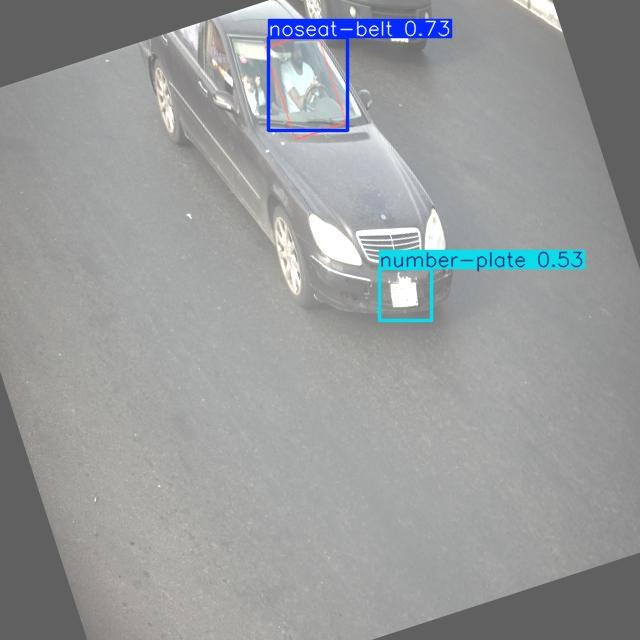

In [11]:
results = model("/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-test-1.jpg", conf=0.5)

for result in results:
    result.save(filename="/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-out-1.jpg")  # Saves detection result

img = Image.open("/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-out-1.jpg")
display(img)

In [13]:
video_path = "/content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video-1.mp4"  # Change to your actual video path

results = model.predict(source=video_path, save=True, conf=0.5, save_dir="/content/drive/MyDrive/TrafficLLM/Seatbelt/")



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/345) /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video-1.mp4: 416x640 (no detections), 26.9ms
video 1/1 (frame 2/345) /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video-1.mp4: 416x640 (no detections), 26.9ms
video 1/1 (frame 3/345) /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video-1.mp4: 416x640 (no detections), 26.9ms
video 1/1 (frame 4/345) /content/drive/MyDrive/TrafficLLM/Seatbelt/seat-video-1.mp4: 416x640 (no detectio